## Signal Processing
The plots created in the last section show a strong annual harmonic component. Lets, identify this components, subtract them from the signal and the re-plot to see if there is any transannual trend.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39309 entries, 1901-02-01 to 2024-02-06
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Regional: Air temperature [C]                      38563 non-null  float64
 1   Days since start of year                           38563 non-null  float64
 2   Days until break up                                38563 non-null  float64
 3   Nenana: Rainfall [mm]                              29547 non-null  float64
 4   Nenana: Snowfall [mm]                              19945 non-null  float64
 5   Nenana: Snow depth [mm]                            15984 non-null  float64
 6   Nenana: Mean water temperature [C]                 2418 non-null   float64
 7   Nenana: Mean Discharge [m3/s]                      22562 non-null  float64
 8   Nenana: Air temperature [C]                        31171 non-null  fl

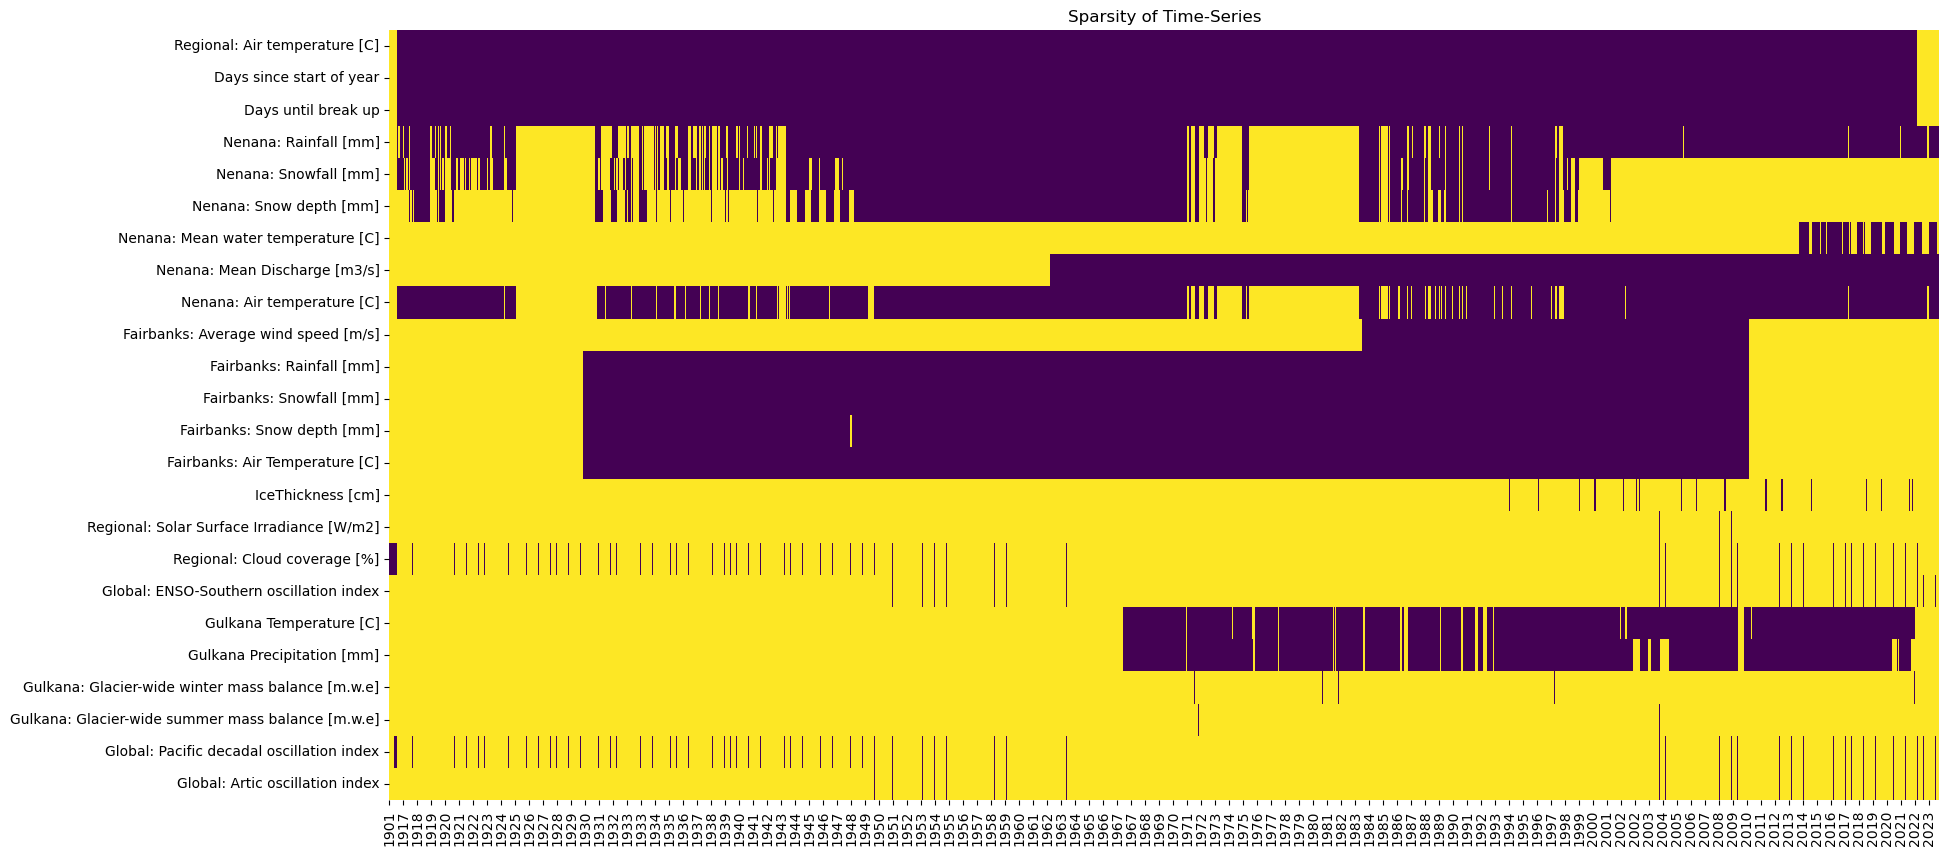

In [12]:
import pandas as pd
import numpy as np
from funciones import*
import matplotlib.pyplot as plt
import funciones


from importlib import reload

Data=pd.read_csv("../../data/Time_series_DATA.txt",skiprows=149,index_col=0,sep='\t')
Data.index = pd.to_datetime(Data.index, format="%Y-%m-%d")
explore_contents(Data,opt={'Sparsity':True,'Info':True,'Time History': False})
#Data=Data.drop(columns=['Days since start of year','Days until break up','Noisy predicted ice thickness [m]'])
#Data=pd.read_csv('https://raw.githubusercontent.com/iceclassic/sandbox/main/Data/Time_series_DATA.txt',index_col=0,skiprows=149)






## Stationary Time Series

In [19]:
# Lets compute the mean

# de trend de data


# plot Spectrogram

# plot Autocorrelation formula

 

### Power Spectral density
A simple way to estimate the Power Spectral Density (PSD) of signal is using the [Welch method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#id1).
> do we explain the theory behind the method?

:::{card} Exercise 1

Read the documentation for `compute_and_plot_psd()` function from the ice_classic package and estimate te PSD for all columns
¿ Do all the variable experience the same seasonal behavior? Is there any multiyear harmonic?

:::


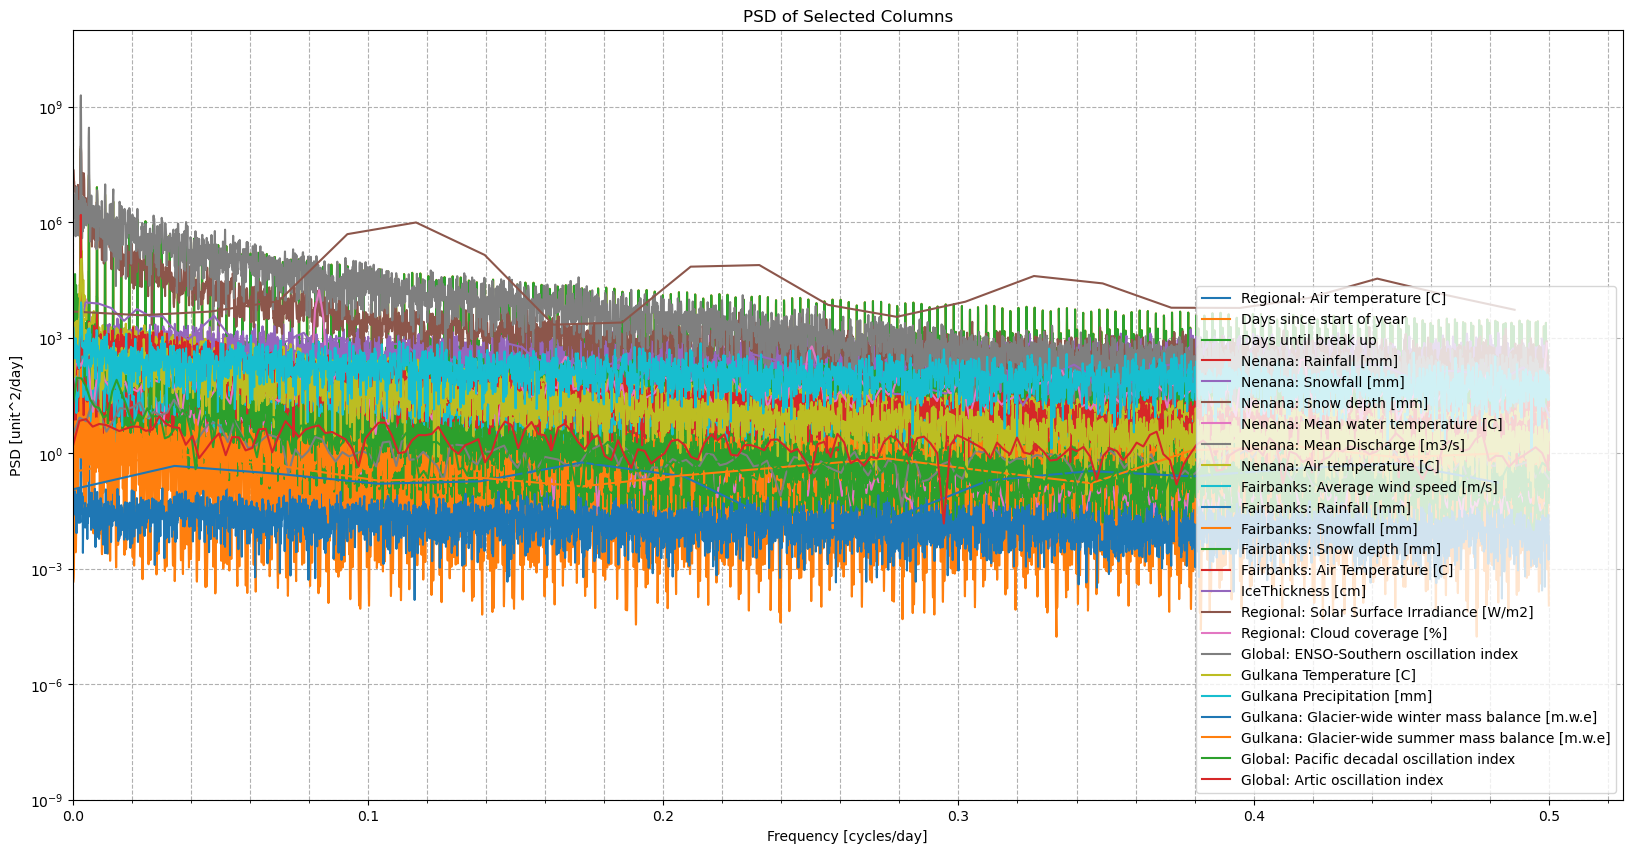

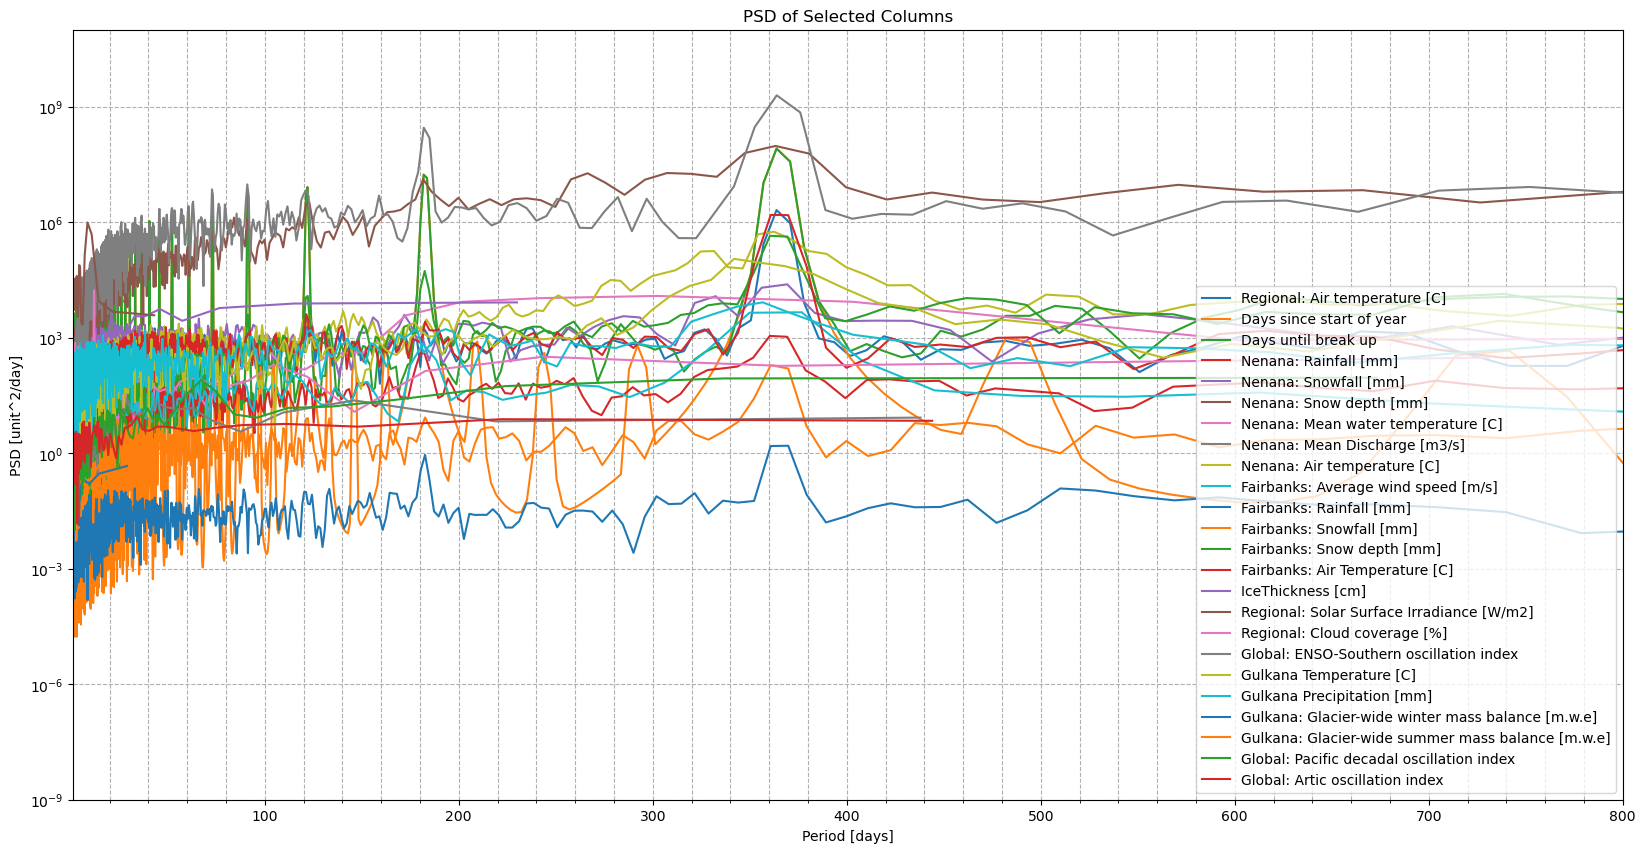

In [22]:
_=compute_and_plot_psd(Data,plot_period=False)	

# given the frequency of our signal, using the period (T) instead of the frequency (1/F) might be better 
PSD_info=compute_and_plot_psd(Data,plot_period=True,find_peaks_kwargs={"distance":100,"threshold":10})	

In the last figures, multiple peaks can be observed with the most prominent being the associated with a period of  350-370, which is  expected as is represent the yearly variation.

One common way to identify the peak of PSD is to use [`find_peaks()`](https://docs.scipy.org/doc/scipy//reference/generated/scipy.signal.find_peaks.html) from  `scipy`.The function `compute_and_plot_psd()` uses internally this function to find the peaks of each column, and saves them in a dictionary. 


::{card} Exercise 2
Extract the peak of each column and compare them.
```{admonition} Tips/Help
:class: tip, dropdown
Look-up the documentation of `[find_peaks]`(https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html). Considering what you expect the peaks to look like, change the values of `prominence`, `distance` and or `threshold` to refine the search for peaks
```
:::



In [23]:
for col, psd_info in PSD_info.items():
    peak_periods =np.round(psd_info['peak_periods']).astype(int) 
    
    print(f"Column: {col}")
    print(f"Peak Periods: {peak_periods}\n")

Column: Regional: Air temperature [C]
Peak Periods: [371 123  61  43  33  27  22  19  17  15  14  13  12  11  10  10   9   9
   8   8   7   7   7   6   6   6   5   5   5   5   5   5   4   4]

Column: Days since start of year
Peak Periods: [371 123  73  52  41  33  28  24  20  18  16  15  13  12  11  10  10   9
   9   8   8   7   7   7   7   6   6   6   6   5   5   5   5   5   5   4
   4   4   4   4   4   4   4   4   4   3   3   3   3   3   3   3   3   3
   3   3   3   3   3   3   3   3   3   2   2   2   2   2   2   2   2   2
   2   2   2   2   2   2]

Column: Days until break up
Peak Periods: [371 123  73  52  41  33  28  24  20  18  16  15  13  12  11  10  10   9
   9   8   8   7   7   7   7   6   6   6   6   5   5   5   5   5   5   4
   4   4   4   4   4   4   4   4   4   3   3   3   3   3   3   3   3   3
   3   3   3   3   3   3   3   3   3   2   2   2   2   2   2   2   2   2
   2   2   2   2   2   2]

Column: Nenana: Rainfall [mm]
Peak Periods: [369  76  49  36  27  22  19  16  14 

Another issue wiht the plot above is that we can observe a lot of high-frequency component, which are most likely associate with noise.
Lets apply a low-pass filter, that block higher frequencies and lets *low frequencies pass* and re-plot.

> show that rolling mean can be thougth of as a low pass filter?

:::{card} Exercise 4
Use the same function as before, but consider the argument chagninf the default of  `apply_filter`, `max_allowed_freq`and `filter_order`
:::




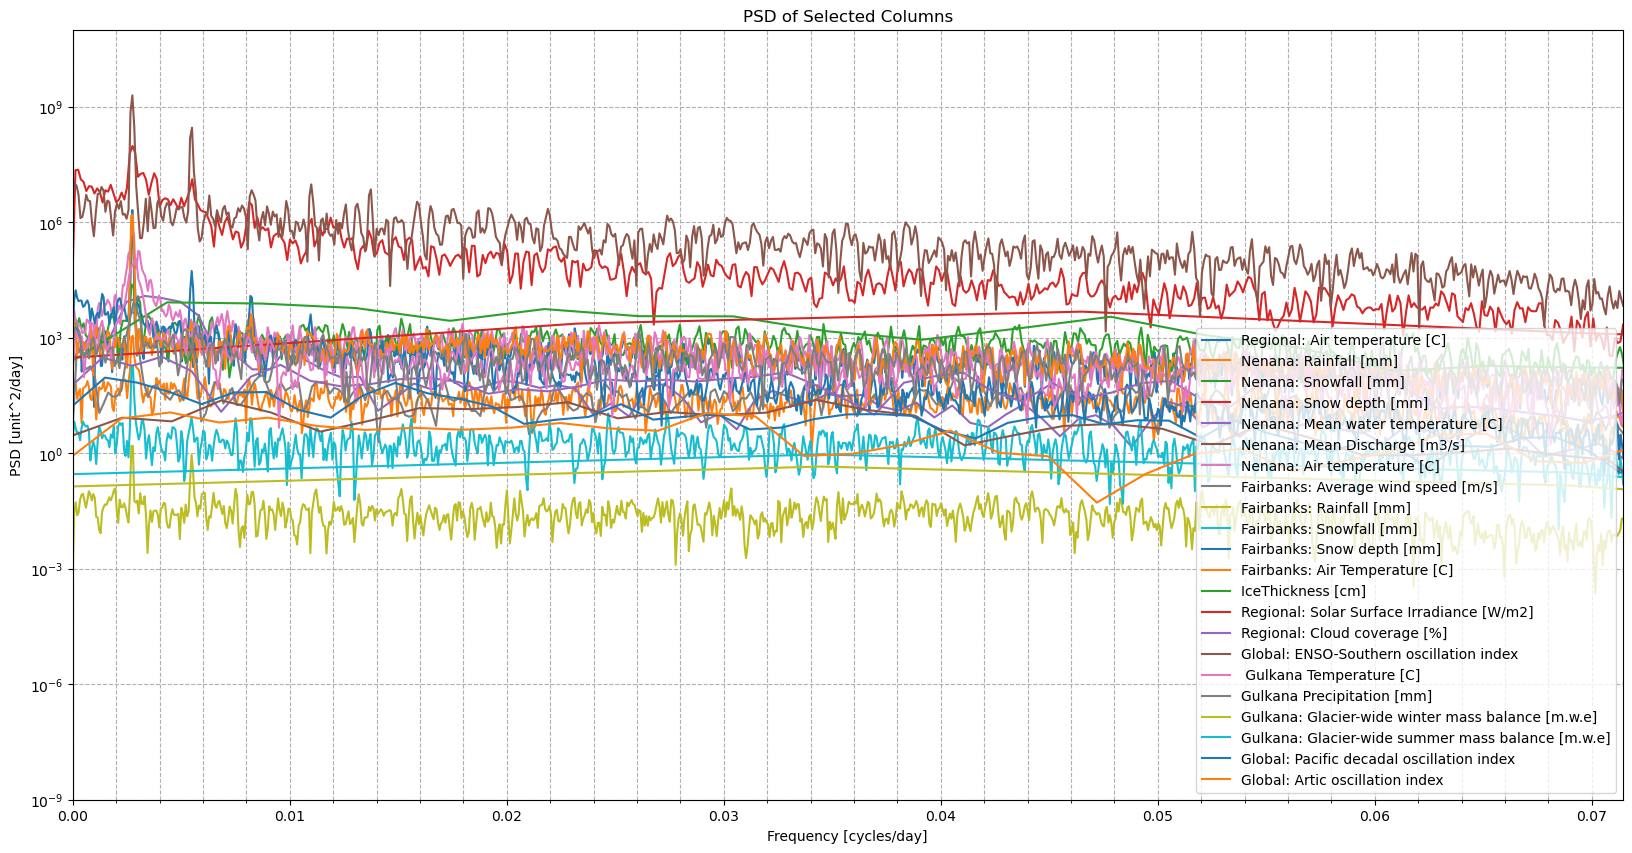

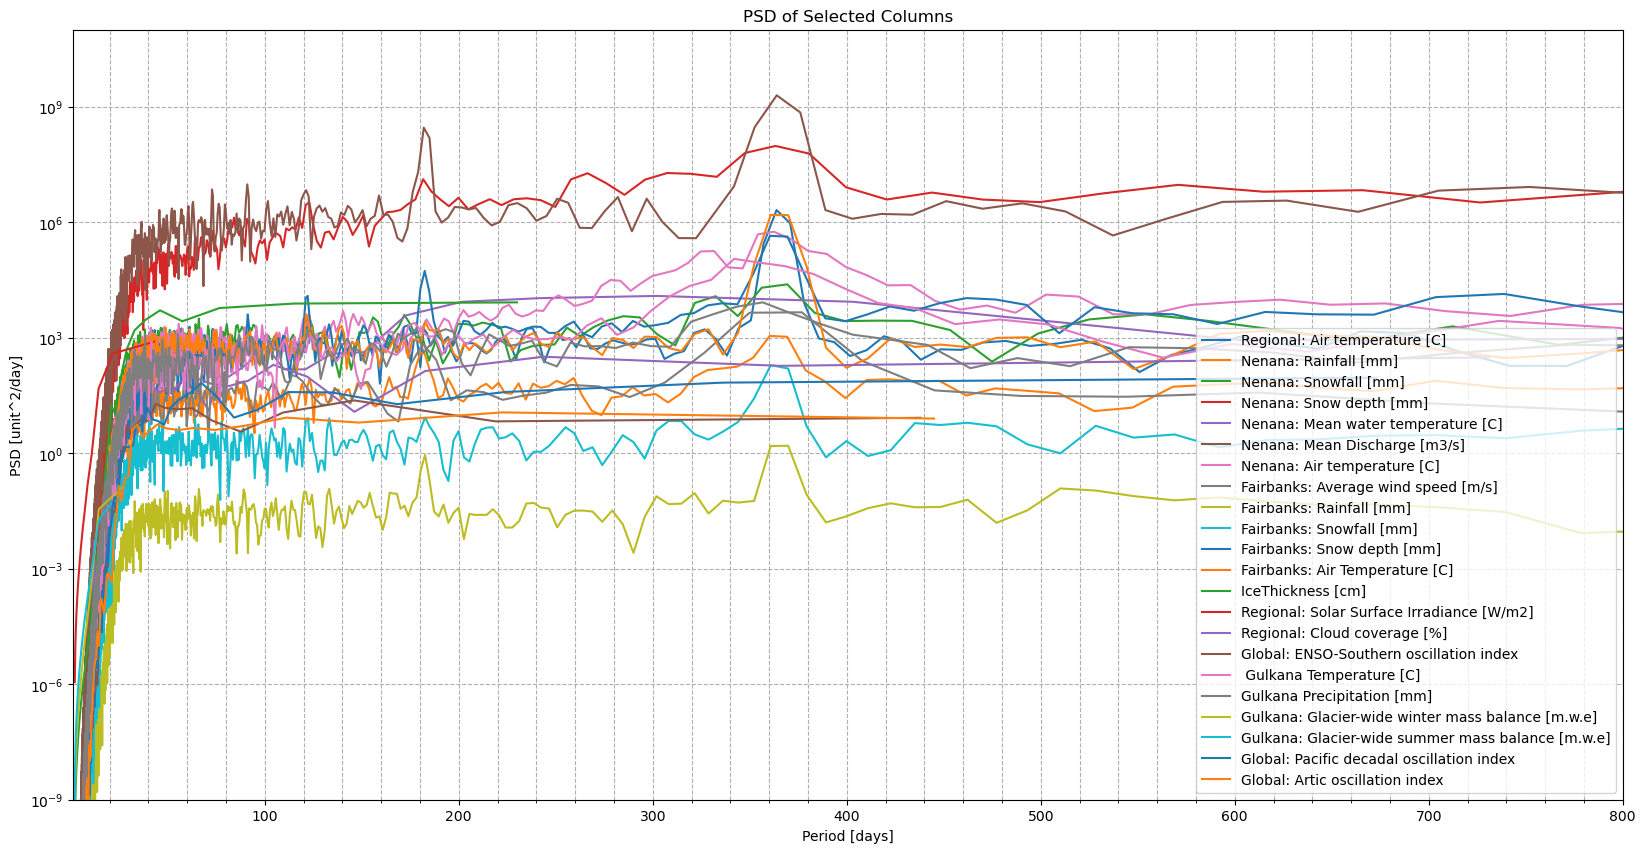

In [7]:
_=compute_and_plot_psd(Data,plot_period=False,find_peaks_kwargs={"distance":100,"threshold":10,"height":1e-2},apply_filter=True,max_allowed_freq=1/14,filter_order=4)
PSD_info=compute_and_plot_psd(Data,plot_period=True,find_peaks_kwargs={"distance":100,"threshold":10,"height":1e-2},apply_filter=True,max_allowed_freq=1/30,filter_order=4)

In [8]:
for col, psd_info in PSD_info.items():
    peak_periods =np.round(psd_info['peak_periods']).astype(int) 
    
    print(f"Column: {col}")
    print(f"Peak Periods: {peak_periods}\n")

Column: Regional: Air temperature [C]
Peak Periods: [371 123  61  43  34  28]

Column: Nenana: Rainfall [mm]
Peak Periods: [369  76  49  35]

Column: Nenana: Snowfall [mm]
Peak Periods: [384  66  38  27]

Column: Nenana: Snow depth [mm]
Peak Periods: [381  65  36  25]

Column: Nenana: Mean water temperature [C]
Peak Periods: [403]

Column: Nenana: Mean Discharge [m3/s]
Peak Periods: [376  73  37  26  21  17]

Column: Nenana: Air temperature [C]
Peak Periods: [371  99  56  41  32  26]

Column: Fairbanks: Average wind speed [m/s]
Peak Periods: [408  41]

Column: Fairbanks: Rainfall [mm]
Peak Periods: []

Column: Fairbanks: Snowfall [mm]
Peak Periods: [370]

Column: Fairbanks: Snow depth [mm]
Peak Periods: [369  92  52  36]

Column: Fairbanks: Air Temperature [C]
Peak Periods: [370  74  49  37  29]

Column: IceThickness [cm]
Peak Periods: [58]

Column: Regional: Solar Surface Irradiance [W/m2]
Peak Periods: []

Column: Regional: Cloud coverage [%]
Peak Periods: [366]

Column: Global: ENSO

> put here plot of historic seasonality+ harmonic identified
